In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [23]:
log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [24]:
# This will load the fashion_mnist dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
# Because these are grayscale images, they can be scaled down to a range between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

val_size = 10000

train_images, val_images = train_images[val_size:], train_images[:val_size]
train_labels, val_labels = train_labels[val_size:], train_labels[:val_size]

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [26]:
# Define the model architecture

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [28]:
# Train the new model

history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4850 - accuracy: 0.8214 - val_loss: 0.3697 - val_accuracy: 0.8686
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3163 - accuracy: 0.8844 - val_loss: 0.3004 - val_accuracy: 0.8878
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2698 - accuracy: 0.9003 - val_loss: 0.2723 - val_accuracy: 0.9008
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2367 - accuracy: 0.9118 - val_loss: 0.2538 - val_accuracy: 0.9081
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2089 - accuracy: 0.9221 - val_loss: 0.2495 - val_accuracy: 0.9079
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1857 - accuracy: 0.9310 - val_loss: 0.2433 - val_accuracy: 0.9129
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1652 - accuracy: 0.9378 - val_loss: 0.2517 - val_ac

In [34]:
# Verify the accuracy on the test 

settest_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss:', settest_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.9085
Test Loss: 0.30304256081581116
Test Accuracy: 0.9085000157356262


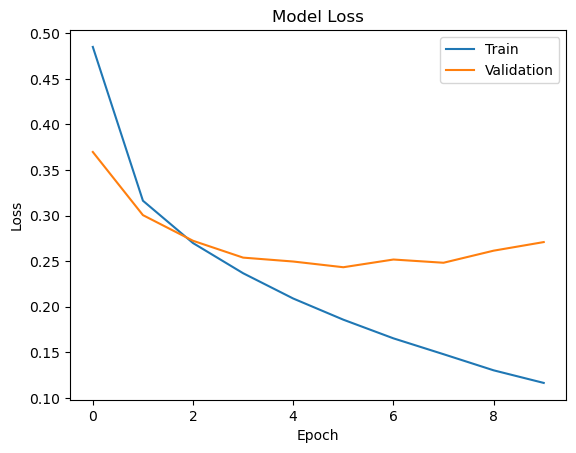

In [31]:
# Training and Validation Loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

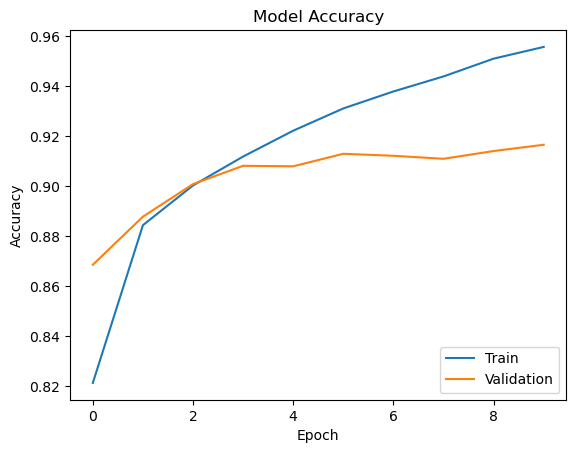

In [32]:
# Training and Validation Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [33]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Launching TensorBoard...

### Conclusion

В заключение, глубокое обучение (deep learning) — это итеративный процесс, в котором обычно необходимо экспериментировать с различными архитектурными компонентами для создания лучшей модели. Некоторые практические правила и передовой опыт можно почерпнуть из опыта и чтения научных статей. Однако, поскольку каждая проблема и соответствующие данные уникальны, эти рекомендации не всегда применимы, и итеративное экспериментирование становится ключом к достижению максимальной производительности.

#### tensorboard --logdir logs/fit 
This command will start TensorBoard. You can access it by opening your web browser and navigating to localhost:6006